## 1. Load and Split Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("data.xlsx")
df.dropna(subset=['Credit_Score'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [3]:
x_columns = df.columns.tolist()
x_columns.remove('Credit_Score')
X = df[x_columns]
y = df['Credit_Score']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 2. Distribution of Pristine Train Data

In [5]:
train = pd.concat([X_train, y_train], axis=1)

In [6]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Outstanding Debt')

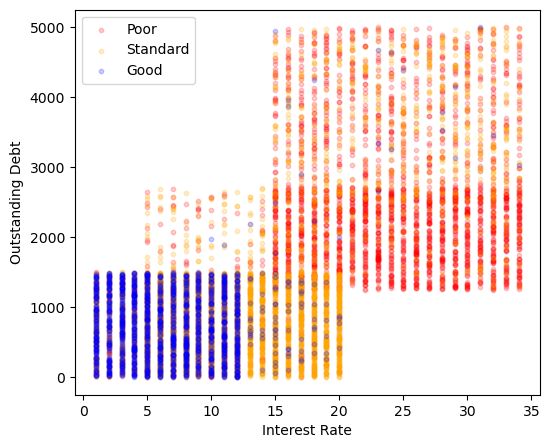

In [7]:
plt.figure(figsize=(6,5))
plt.scatter(train[train["Credit_Score"]==0]["Interest_Rate"], train[train["Credit_Score"]==0]["Outstanding_Debt"], s=10, c='red', alpha=0.2, label="Poor")
plt.scatter(train[train["Credit_Score"]==1]["Interest_Rate"], train[train["Credit_Score"]==1]["Outstanding_Debt"], s=10, c='orange', alpha=0.2, label="Standard")
plt.scatter(train[train["Credit_Score"]==2]["Interest_Rate"], train[train["Credit_Score"]==2]["Outstanding_Debt"], s=10, c='blue', alpha=0.2, label="Good")
plt.legend()
plt.xlabel("Interest Rate")
plt.ylabel("Outstanding Debt")

## 3. Create Imbalanced Train Data Deliberately

In [8]:
train_0 = train[train['Credit_Score'] == 0]
train_1 = train[train['Credit_Score'] == 1]
train_2 = train[train['Credit_Score'] == 2]

In [9]:
train_0 = train_0.sample(frac=0.2)
train_2 = train_2.sample(frac=0.2)

In [10]:
train = pd.concat([train_0, train_1, train_2], axis=0)

Text(0, 0.5, 'Outstanding Debt')

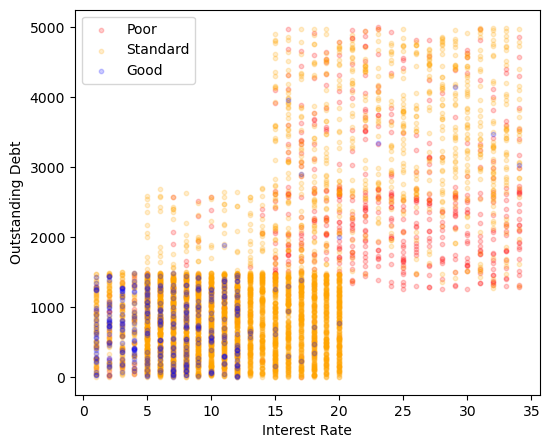

In [11]:
plt.figure(figsize=(6,5))
plt.scatter(train[train["Credit_Score"]==0]["Interest_Rate"], train[train["Credit_Score"]==0]["Outstanding_Debt"], s=10, c='red', alpha=0.2, label="Poor")
plt.scatter(train[train["Credit_Score"]==1]["Interest_Rate"], train[train["Credit_Score"]==1]["Outstanding_Debt"], s=10, c='orange', alpha=0.2, label="Standard")
plt.scatter(train[train["Credit_Score"]==2]["Interest_Rate"], train[train["Credit_Score"]==2]["Outstanding_Debt"], s=10, c='blue', alpha=0.2, label="Good")
plt.legend()
plt.xlabel("Interest Rate")
plt.ylabel("Outstanding Debt")

In [12]:
x_columns = train.columns.tolist()
x_columns.remove('Credit_Score')
X_train = train[x_columns]
y_train = train['Credit_Score']

## 4. Define Data Transformer

In [13]:
from sklearn.preprocessing import LabelEncoder

class Data_Transformer(object):
    
    def fit(self, X, y=None):
        self.mean_age = X["Age"].mean()
        self.occu_le = LabelEncoder() # create label-encoder
        encoded_occupation = pd.Series(self.occu_le.fit_transform(X["Occupation"])) # fit and transform occupation with label-encoder
        self.majority_occupation = encoded_occupation.mode()[0] # obtain majority occupation code
        self.mean_annual_income = X["Annual_Income"].mean()
        self.mean_monthly_inhand_salary = X["Monthly_Inhand_Salary"].mean()
        self.mean_num_bank_accounts = X["Num_Bank_Accounts"].mean()
        self.mean_num_creadit_card = X["Num_Credit_Card"].mean()
        self.mean_num_interest_rate = X['Interest_Rate'].mean()
        self.mean_num_of_loan = X['Num_of_Loan'].mean()
        self.mean_delay_from_due_date = X['Delay_from_due_date'].mean()
        self.mean_num_of_delayed_payment = X['Num_of_Delayed_Payment'].mean()
        self.mean_changed_credit_limit = X['Changed_Credit_Limit'].mean()
        self.mean_num_credit_inquiries = X['Num_Credit_Inquiries'].mean()
        self.cm_le = LabelEncoder() # create label-encoder
        encoded_credit_mix = pd.Series(self.cm_le.fit_transform(X["Credit_Mix"])) # fit and transform credit mix with label-encoder
        self.majority_credit_mix = encoded_credit_mix.mode()[0] # obtain majority credit mix code
        self.mean_outstanding_debt = X['Outstanding_Debt'].mean()
        self.mean_credit_history_age = X['Credit_History_Age'].mean()
        self.pma_le = LabelEncoder() # create label-encoder
        encoded_payment_of_min_amount = pd.Series(self.pma_le.fit_transform(X["Payment_of_Min_Amount"])) # fit and transform payment of min amount with label-encoder
        self.majority_payment_of_min_amount = encoded_payment_of_min_amount.mode()[0] # obtain majority payment of min amount
        self.mean_total_EMI_per_month = X['Total_EMI_per_month'].mean()
        self.mean_amount_invested_monthly = X['Amount_invested_monthly'].mean()
        self.pb_le = LabelEncoder() # create label-encoder
        encoded_payment_behaviour = pd.Series(self.pb_le.fit_transform(X["Payment_Behaviour"])) # fit and transform payment behaviour with label-encoder
        self.majority_payment_behaviour = encoded_payment_behaviour.mode()[0] # obtain majority payment behaviour
        self.mean_monthly_balance = X['Monthly_Balance'].mean()
        
    def transform(self, X, y=None):
        new_df = pd.DataFrame()
        new_df["Age"] = X["Age"]
        new_df["Age"].fillna(self.mean_age,inplace=True)
        new_df["Occupation"] = self.occu_le.transform(X["Occupation"])
        new_df["Occupation"].fillna(self.majority_occupation,inplace=True)
        new_df["Annual_Income"] = X["Annual_Income"]
        new_df["Annual_Income"].fillna(self.mean_annual_income,inplace=True)
        new_df["Monthly_Inhand_Salary"] = X["Monthly_Inhand_Salary"]
        new_df["Monthly_Inhand_Salary"].fillna(self.mean_monthly_inhand_salary,inplace=True)
        new_df["Num_Bank_Accounts"] = X["Num_Bank_Accounts"]
        new_df["Num_Bank_Accounts"].fillna(self.mean_num_bank_accounts,inplace=True)
        new_df["Num_Credit_Card"] = X["Num_Credit_Card"]
        new_df["Num_Credit_Card"].fillna(self.mean_num_creadit_card,inplace=True)
        new_df["Interest_Rate"] = X["Interest_Rate"]
        new_df["Interest_Rate"].fillna(self.mean_num_interest_rate,inplace=True)
        new_df["Num_of_Loan"] = X["Num_of_Loan"]
        new_df["Num_of_Loan"].fillna(self.mean_num_of_loan,inplace=True)
        new_df["Delay_from_due_date"] = X["Delay_from_due_date"]
        new_df["Delay_from_due_date"].fillna(self.mean_delay_from_due_date,inplace=True)
        new_df["Num_of_Delayed_Payment"] = X["Num_of_Delayed_Payment"]
        new_df["Num_of_Delayed_Payment"].fillna(self.mean_num_of_delayed_payment,inplace=True)
        new_df["Changed_Credit_Limit"] = X["Changed_Credit_Limit"]
        new_df["Changed_Credit_Limit"].fillna(self.mean_changed_credit_limit,inplace=True)
        new_df["Num_Credit_Inquiries"] = X["Num_Credit_Inquiries"]
        new_df["Num_Credit_Inquiries"].fillna(self.mean_num_credit_inquiries,inplace=True)
        new_df["Credit_Mix"] = self.cm_le.transform(X["Credit_Mix"])
        new_df["Credit_Mix"].fillna(self.majority_credit_mix,inplace=True)
        new_df["Outstanding_Debt"] = X["Outstanding_Debt"]
        new_df["Outstanding_Debt"].fillna(self.mean_outstanding_debt,inplace=True)
        new_df["Credit_History_Age"] = X["Credit_History_Age"]
        new_df["Credit_History_Age"].fillna(self.mean_credit_history_age,inplace=True)
        new_df["Payment_of_Min_Amount"] = self.pma_le.transform(X["Payment_of_Min_Amount"])
        new_df["Payment_of_Min_Amount"].fillna(self.majority_payment_of_min_amount,inplace=True)
        new_df["Total_EMI_per_month"] = X["Total_EMI_per_month"]
        new_df["Total_EMI_per_month"].fillna(self.mean_total_EMI_per_month,inplace=True)
        new_df["Amount_invested_monthly"] = X["Amount_invested_monthly"]
        new_df["Amount_invested_monthly"].fillna(self.mean_amount_invested_monthly,inplace=True)
        new_df["Payment_Behaviour"] = self.pb_le.transform(X["Payment_Behaviour"])
        new_df["Payment_Behaviour"].fillna(self.majority_payment_behaviour,inplace=True)
        new_df["Monthly_Balance"] = X["Monthly_Balance"]
        new_df["Monthly_Balance"].fillna(self.mean_monthly_balance,inplace=True)
        return new_df
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

## 5. Train RandomForesfClassifier with the Imbalance Data

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
steps = [('dtf', Data_Transformer()),
        ('rfc', RandomForestClassifier())]
model = Pipeline(steps)

In [16]:
model.fit(X_train, y_train)

Pipeline(steps=[('dtf',
                 <__main__.Data_Transformer object at 0x000001507AB4E9D0>),
                ('rfc', RandomForestClassifier())])

In [17]:
y_test_pred = model.predict(X_test)

In [18]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.54      0.67       822
           1       0.60      0.96      0.74      1217
           2       0.85      0.11      0.20       461

    accuracy                           0.66      2500
   macro avg       0.79      0.54      0.54      2500
weighted avg       0.75      0.66      0.62      2500



In [19]:
confusion_matrix(y_test,y_test_pred)

array([[ 441,  379,    2],
       [  45, 1165,    7],
       [   1,  407,   53]], dtype=int64)

In [20]:
from yellowbrick.classifier import ClassificationReport,ConfusionMatrix,ROCAUC

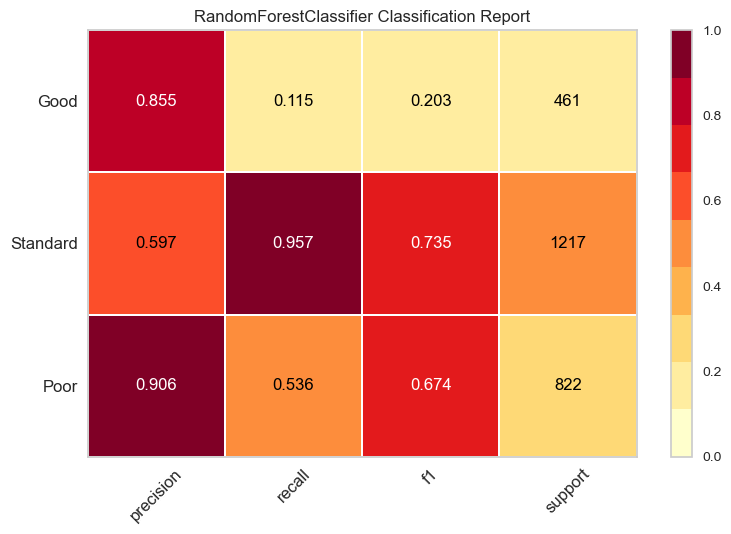

<Axes: title={'center': 'RandomForestClassifier Classification Report'}>

In [21]:
visualizer = ClassificationReport(model, classes=["Poor", "Standard", "Good"], support=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

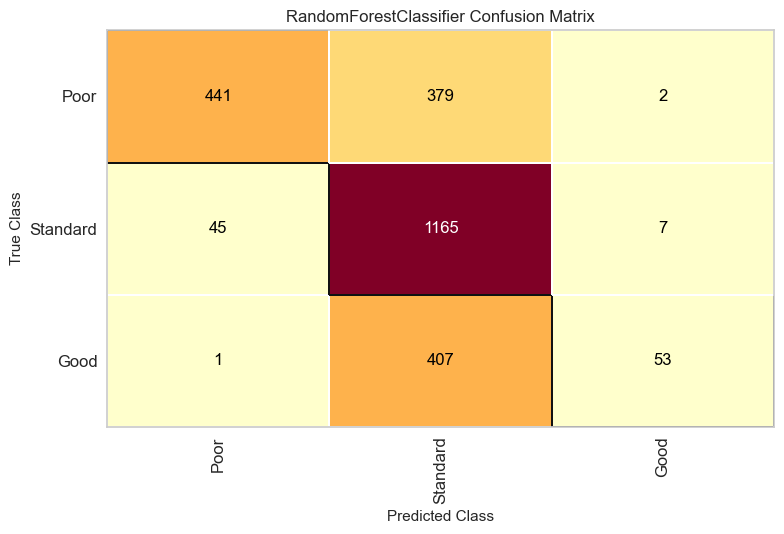

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [22]:
visualizer = ConfusionMatrix(model, classes=["Poor", "Standard", "Good"])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

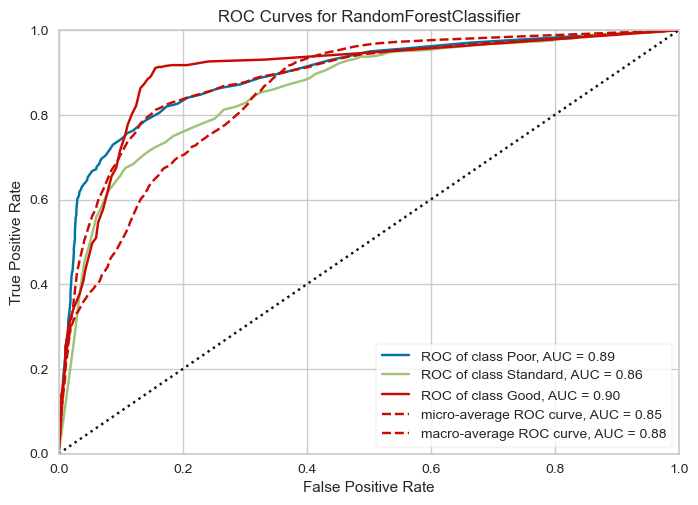

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [23]:
visualizer = ROCAUC(model, classes=["Poor", "Standard", "Good"])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

## 6. Over-sample the Imbalanced Data with SMOTE

In [24]:
X_train

,Customer_ID,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
3629,CUS_0x47e3,Jessica Donatio,38.000000,326-46-1131,Architect,7750.735,701.894583,3.0,7.0,25,...,12.750000,Standard,1651.44,31.558922,10.214286,Yes,17.191110,54.274492,Low_spent_Small_value_payments,276.223856
7808,CUS_0x854c,Jessica Toonkelf,34.250000,412-53-8508,Manager,32434.640,2601.886667,7.0,5.0,33,...,10.250000,Standard,2620.89,35.333237,9.875000,Yes,52.362912,118.110457,High_spent_Medium_value_payments,351.818977
2710,CUS_0x3ad2,Hyunjoo Jiny,33.875000,331-26-9664,Engineer,112812.240,9417.020000,0.0,5.0,2,...,3.375000,Good,506.96,34.137723,29.357143,No,0.000000,302.928729,High_spent_Medium_value_payments,853.966876
5515,CUS_0x631e,Nivedita Bhattacharjeed,15.375000,838-51-8043,Lawyer,129780.440,11034.036667,5.0,3.0,18,...,7.857143,Standard,1163.57,34.822810,22.125000,Yes,250.190735,659.682933,High_spent_Large_value_payments,728.761380
12429,CUS_0xeda,Ringstrom Johanm,43.000000,445-18-7956,Mechanic,78999.960,6396.330000,8.0,5.0,20,...,14.285714,Bad,2062.79,32.040531,9.476190,Yes,138.260606,316.348880,High_spent_Large_value_payments,517.002383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7550,CUS_0x8135,Padraic Halpind,31.500000,939-55-7203,Scientist,39550.490,3451.874167,3.0,4.0,1,...,2.250000,Good,234.48,30.231104,25.440476,No,70.313040,131.502999,High_spent_Medium_value_payments,403.371377
11927,CUS_0xc1c6,Poornima Guptak,31.125000,807-95-9558,Manager,134504.680,11187.723333,0.0,2.0,8,...,4.875000,Good,1193.54,33.249458,32.583333,No,72.811028,516.664825,Low_spent_Medium_value_payments,732.882072
1403,CUS_0x26b1,Wanfenga,41.833333,071-50-1701,Architect,160052.200,13580.683333,4.0,1.0,10,...,6.250000,Good,1118.35,35.313262,21.625000,No,207.864807,687.150928,High_spent_Large_value_payments,741.294270
6681,CUS_0x7423,Nate Raymondn,52.000000,866-11-3352,Musician,42274.960,3284.913333,3.0,7.0,1,...,2.000000,Good,703.05,34.052923,31.125000,No,0.000000,170.065673,High_spent_Small_value_payments,429.675660


In [25]:
from imblearn.over_sampling import SMOTENC

In [26]:
smt = SMOTENC(categorical_features=[0,1,3,4,11,16,20,23])
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)

In [27]:
train_smt = pd.concat([X_train_smt, y_train_smt], axis=1)

Text(0, 0.5, 'Outstanding Debt')

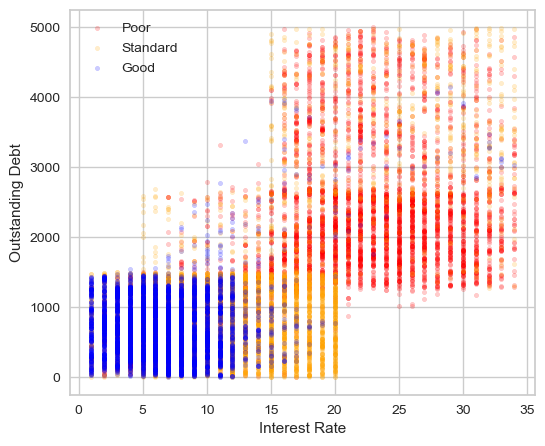

In [28]:
plt.figure(figsize=(6,5))
plt.scatter(train_smt[train_smt["Credit_Score"]==0]["Interest_Rate"], train_smt[train_smt["Credit_Score"]==0]["Outstanding_Debt"], s=10, c='red', alpha=0.2, label="Poor")
plt.scatter(train_smt[train_smt["Credit_Score"]==1]["Interest_Rate"], train_smt[train_smt["Credit_Score"]==1]["Outstanding_Debt"], s=10, c='orange', alpha=0.2, label="Standard")
plt.scatter(train_smt[train_smt["Credit_Score"]==2]["Interest_Rate"], train_smt[train_smt["Credit_Score"]==2]["Outstanding_Debt"], s=10, c='blue',alpha=0.2, label="Good")
plt.legend()
plt.xlabel("Interest Rate")
plt.ylabel("Outstanding Debt")

## 7. Train RandomForesfClassifier with the SMOTE-over-sampled Data

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
steps = [('dtf', Data_Transformer()),
        ('rfc', RandomForestClassifier())]
model = Pipeline(steps)

In [31]:
model.fit(X_train_smt, y_train_smt)

Pipeline(steps=[('dtf',
                 <__main__.Data_Transformer object at 0x000001507D071850>),
                ('rfc', RandomForestClassifier())])

In [32]:
y_test_pred = model.predict(X_test)

In [33]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.65      0.73       822
           1       0.68      0.86      0.76      1217
           2       0.65      0.46      0.54       461

    accuracy                           0.72      2500
   macro avg       0.72      0.66      0.68      2500
weighted avg       0.73      0.72      0.71      2500



In [34]:
confusion_matrix(y_test,y_test_pred)

array([[ 532,  255,   35],
       [  94, 1044,   79],
       [   6,  241,  214]], dtype=int64)

In [35]:
from yellowbrick.classifier import ClassificationReport,ConfusionMatrix,ROCAUC

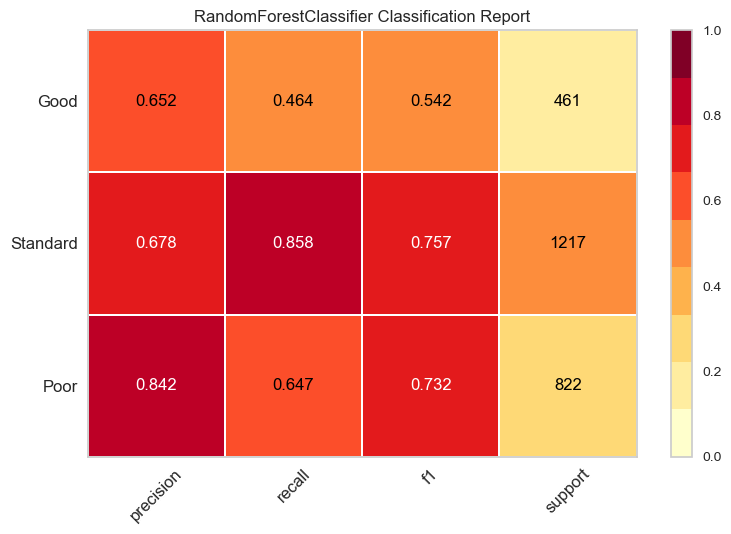

<Axes: title={'center': 'RandomForestClassifier Classification Report'}>

In [36]:
visualizer = ClassificationReport(model, classes=["Poor", "Standard", "Good"], support=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

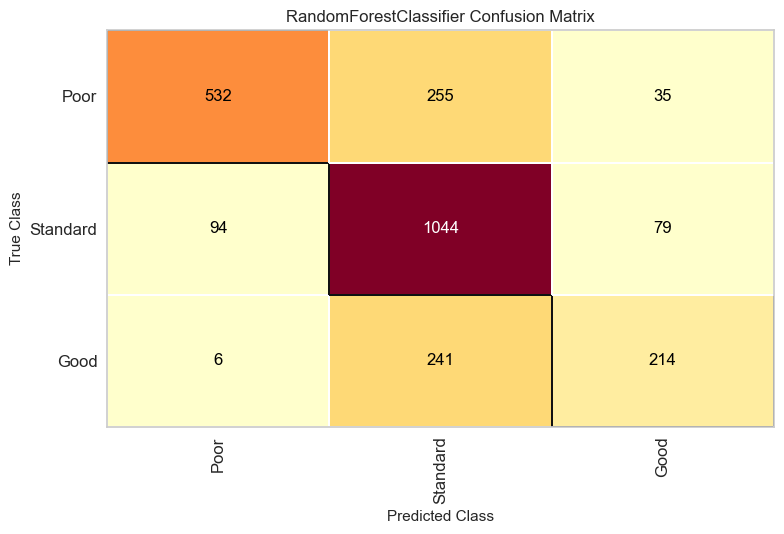

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [37]:
visualizer = ConfusionMatrix(model, classes=["Poor", "Standard", "Good"])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

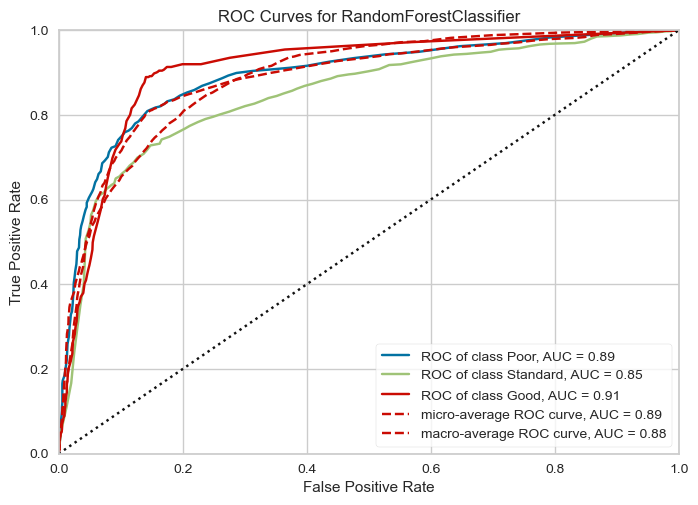

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [38]:
visualizer = ROCAUC(model, classes=["Poor", "Standard", "Good"])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

## 8. Over-sample the Imbalanced Data with RandomOverSampler

In [39]:
dtf = Data_Transformer()
X_train = dtf.fit_transform(X_train)
X_test = dtf.transform(X_test)

In [40]:
from imblearn.over_sampling import RandomOverSampler

In [41]:
ros = RandomOverSampler()
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [42]:
train_ros = pd.concat([X_train_ros, y_train_ros], axis=1)

Text(0, 0.5, 'Outstanding Debt')

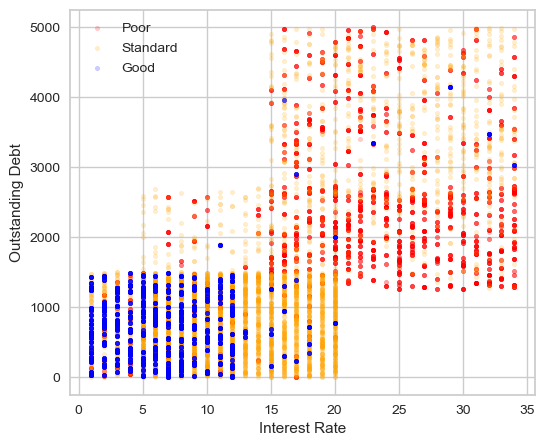

In [43]:
plt.figure(figsize=(6,5))
plt.scatter(train_ros[train_ros["Credit_Score"]==0]["Interest_Rate"], train_ros[train_ros["Credit_Score"]==0]["Outstanding_Debt"], s=10, c='red', alpha=0.2, label="Poor")
plt.scatter(train_ros[train_ros["Credit_Score"]==1]["Interest_Rate"], train_ros[train_ros["Credit_Score"]==1]["Outstanding_Debt"], s=10, c='orange', alpha=0.2, label="Standard")
plt.scatter(train_ros[train_ros["Credit_Score"]==2]["Interest_Rate"], train_ros[train_ros["Credit_Score"]==2]["Outstanding_Debt"], s=10, c='blue',alpha=0.2, label="Good")
plt.legend()
plt.xlabel("Interest Rate")
plt.ylabel("Outstanding Debt")

## 9. Train RandomForesfClassifier with the RandomOverSampler-over-sampled Data

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [45]:
model = RandomForestClassifier()

In [46]:
model.fit(X_train_ros, y_train_ros)

RandomForestClassifier()

In [47]:
y_test_pred = model.predict(X_test)

In [48]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.55      0.69       822
           1       0.61      0.94      0.74      1217
           2       0.77      0.21      0.33       461

    accuracy                           0.68      2500
   macro avg       0.76      0.57      0.59      2500
weighted avg       0.74      0.68      0.65      2500



In [49]:
confusion_matrix(y_test,y_test_pred)

array([[ 454,  364,    4],
       [  43, 1149,   25],
       [   4,  359,   98]], dtype=int64)

In [50]:
from yellowbrick.classifier import ClassificationReport,ConfusionMatrix,ROCAUC

c:\Users\fhan1\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


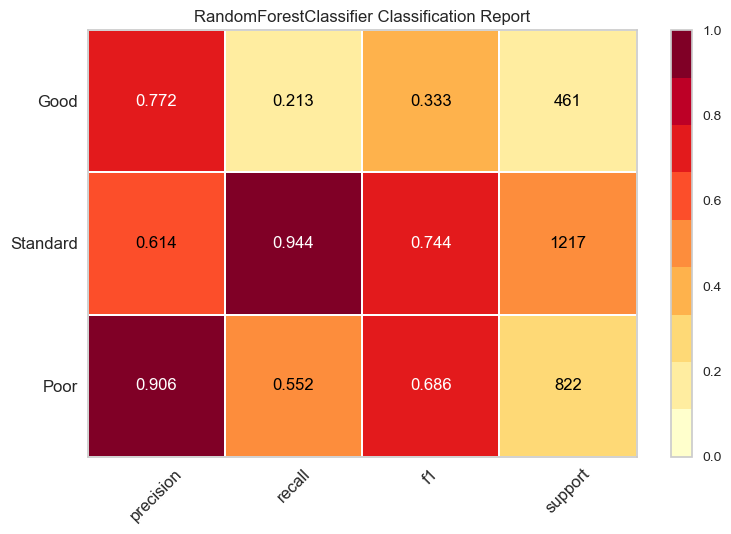

<Axes: title={'center': 'RandomForestClassifier Classification Report'}>

In [51]:
visualizer = ClassificationReport(model, classes=["Poor", "Standard", "Good"], support=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

c:\Users\fhan1\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


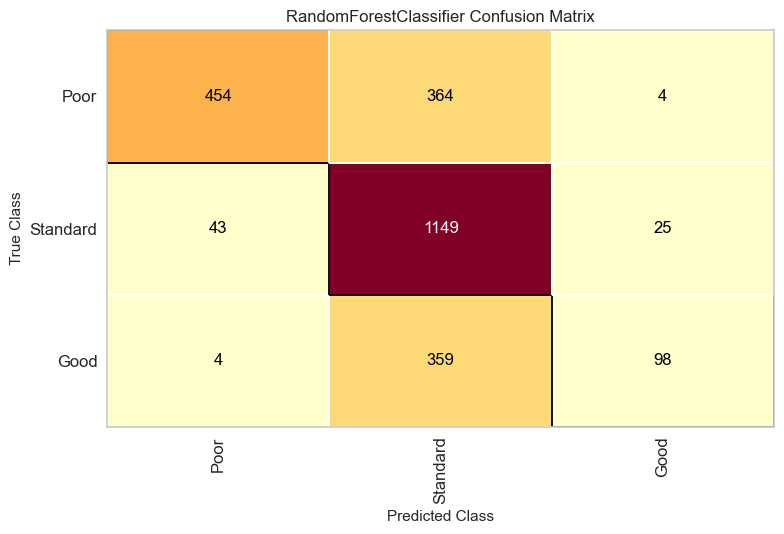

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [52]:
visualizer = ConfusionMatrix(model, classes=["Poor", "Standard", "Good"])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

c:\Users\fhan1\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


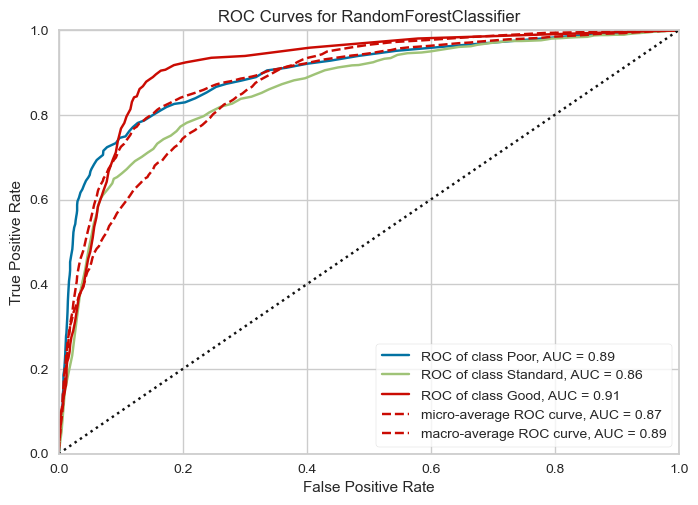

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [53]:
visualizer = ROCAUC(model, classes=["Poor", "Standard", "Good"])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

## 10. Over-sample the Imbalanced Data with ADASYN

In [54]:
from imblearn.over_sampling import ADASYN

In [55]:
ada = ADASYN()
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)

In [56]:
train_ada = pd.concat([X_train_ada, y_train_ada], axis=1)

Text(0, 0.5, 'Outstanding Debt')

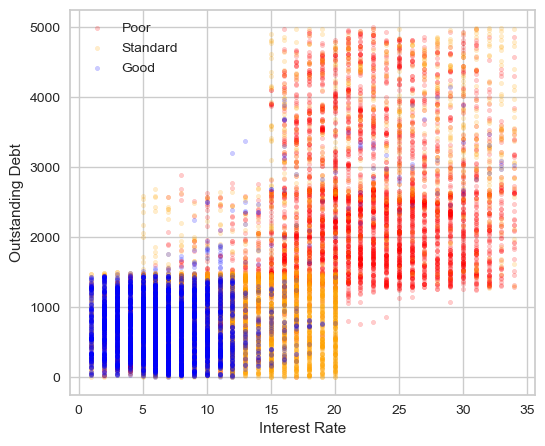

In [57]:
plt.figure(figsize=(6,5))
plt.scatter(train_ada[train_ada["Credit_Score"]==0]["Interest_Rate"], train_ada[train_ada["Credit_Score"]==0]["Outstanding_Debt"], s=10, c='red', alpha=0.2, label="Poor")
plt.scatter(train_ada[train_ada["Credit_Score"]==1]["Interest_Rate"], train_ada[train_ada["Credit_Score"]==1]["Outstanding_Debt"], s=10, c='orange', alpha=0.2, label="Standard")
plt.scatter(train_ada[train_ada["Credit_Score"]==2]["Interest_Rate"], train_ada[train_ada["Credit_Score"]==2]["Outstanding_Debt"], s=10, c='blue',alpha=0.2, label="Good")
plt.legend()
plt.xlabel("Interest Rate")
plt.ylabel("Outstanding Debt")

## 11. Train RandomForesfClassifier with the ADASYN-over-sampled Data

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [59]:
model = RandomForestClassifier()

In [60]:
model.fit(X_train_ada, y_train_ada)

RandomForestClassifier()

In [61]:
y_test_pred = model.predict(X_test)

In [62]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.65      0.73       822
           1       0.68      0.87      0.76      1217
           2       0.67      0.43      0.53       461

    accuracy                           0.72      2500
   macro avg       0.73      0.65      0.67      2500
weighted avg       0.73      0.72      0.71      2500



In [63]:
confusion_matrix(y_test,y_test_pred)

array([[ 536,  259,   27],
       [  90, 1055,   72],
       [  19,  242,  200]], dtype=int64)

In [64]:
from yellowbrick.classifier import ClassificationReport,ConfusionMatrix,ROCAUC

c:\Users\fhan1\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


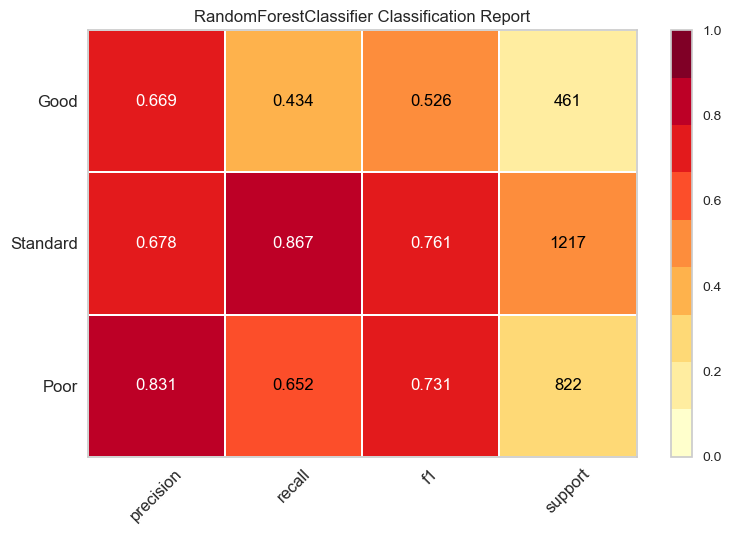

<Axes: title={'center': 'RandomForestClassifier Classification Report'}>

In [65]:
visualizer = ClassificationReport(model, classes=["Poor", "Standard", "Good"], support=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

c:\Users\fhan1\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


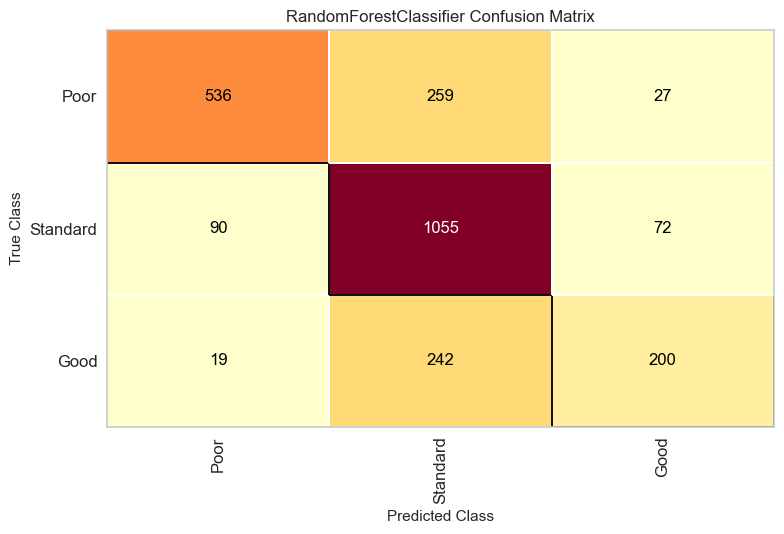

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [66]:
visualizer = ConfusionMatrix(model, classes=["Poor", "Standard", "Good"])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

c:\Users\fhan1\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


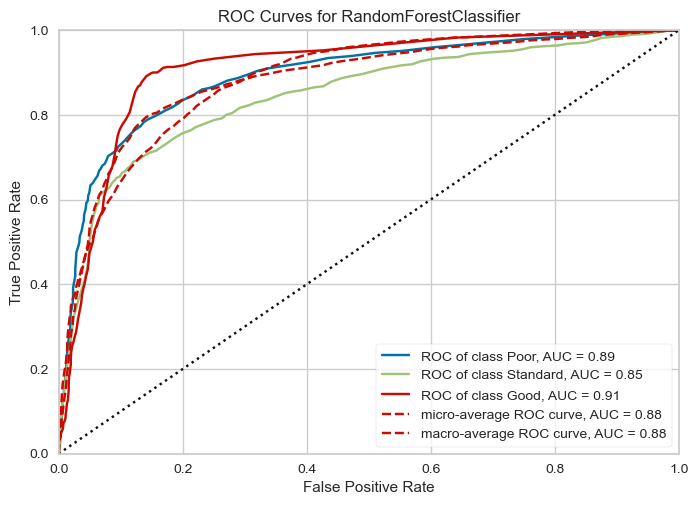

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [67]:
visualizer = ROCAUC(model, classes=["Poor", "Standard", "Good"])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()